In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic #used for making detections | Holistic model
mp_drawing = mp.solutions.drawing_utils # used for drawing them(detection)

# Writing Functions to use the Mediapipe as per our need

In [3]:
# detecting landmarks using mediapipe
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False  #sets the image writable to false
    results = model.process(image) #detecting image using mediapipe..it will be a frame from opencv
    #make predictions
    image.flags.writeable=True
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [4]:
# it does not return the image but rather applies the landmark visualizations
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
#     return

In [102]:
# Better version of the above function for drawing landmarks
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,
                                 mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1), #will color landmark
                                 mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1) #will color connections
                                )
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80,22,10),thickness=1,circle_radius=4), #will color landmark
                                 mp_drawing.DrawingSpec(color=(80,44,121),thickness=1,circle_radius=2) #will color connections
                             )
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(121,22,76),thickness=1,circle_radius=4), #will color landmark
                                 mp_drawing.DrawingSpec(color=(121,44,250),thickness=1,circle_radius=2) #will color connections
                             )
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,60),thickness=1,circle_radius=4), #will color landmark
                                 mp_drawing.DrawingSpec(color=(245,66,230),thickness=1,circle_radius=2) #will color connections
                             )
    

In [7]:
# cv2.VideoCapture(0): Means first camera or webcam. 
# cv2.VideoCapture(1): Means second camera or webcam.
# cv2.VideoCapture("file name.mp4"): Means video file

cap = cv2.VideoCapture(0)
#access mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Reading the frame 
        # if no frame is readed and error will be generated.
        ret,frame = cap.read()
        #Making detections
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        #Drawing landmarks
#         draw_landmarks(image,results)
        draw_styled_landmarks(image,results)
        #show in screen
        # show the frame on =image window
        cv2.imshow('OpenCV Feed',image)
        # and if in b/w the frame running , any one want to stop the execution .
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [8]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
results.pose_landmarks

In [7]:
len(results.pose_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [28]:
frame #last frame cam captures

array([[[161, 161, 155],
        [161, 161, 155],
        [161, 161, 155],
        ...,
        [167, 163, 158],
        [167, 163, 158],
        [167, 163, 158]],

       [[161, 161, 155],
        [161, 161, 155],
        [161, 161, 155],
        ...,
        [167, 162, 157],
        [168, 163, 158],
        [168, 163, 158]],

       [[161, 161, 155],
        [161, 161, 155],
        [161, 161, 155],
        ...,
        [168, 162, 157],
        [168, 162, 157],
        [168, 162, 157]],

       ...,

       [[ 93,  97, 106],
        [ 94,  98, 107],
        [ 94,  99, 108],
        ...,
        [125, 130, 139],
        [123, 129, 138],
        [121, 128, 137]],

       [[ 93,  98, 107],
        [ 95, 100, 109],
        [ 97, 102, 111],
        ...,
        [126, 131, 140],
        [124, 130, 139],
        [122, 129, 138]],

       [[ 94,  99, 108],
        [ 96, 101, 110],
        [ 99, 104, 113],
        ...,
        [128, 132, 141],
        [126, 132, 141],
        [124, 131, 140]]

In [37]:
results

mediapipe.python.solution_base.SolutionOutputs

In [116]:
plt.imshow(frame)

In [115]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [114]:
draw_landmarks(frame,results)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [58]:
#extract keypoint values

In [61]:
results.pose_landmarks

[x: 0.50994235
y: 0.19051425
z: -2.2482133
visibility: 0.9969244
, x: 0.54809344
y: 0.07876659
z: -2.271284
visibility: 0.9921101
, x: 0.57158035
y: 0.08217894
z: -2.2708364
visibility: 0.9928088
, x: 0.5938651
y: 0.08672038
z: -2.2716134
visibility: 0.9911387
, x: 0.47924942
y: 0.083167195
z: -2.2412252
visibility: 0.9946895
, x: 0.45507818
y: 0.08880613
z: -2.2417605
visibility: 0.9961268
, x: 0.43008175
y: 0.09452458
z: -2.24231
visibility: 0.9964823
, x: 0.62367547
y: 0.08294842
z: -1.992914
visibility: 0.9912811
, x: 0.4038876
y: 0.09439227
z: -1.8348913
visibility: 0.9969481
, x: 0.5570237
y: 0.24975875
z: -2.1076035
visibility: 0.99670094
, x: 0.46706375
y: 0.2752581
z: -2.0631423
visibility: 0.9984028
, x: 0.8449336
y: 0.4253694
z: -1.4832187
visibility: 0.98556906
, x: 0.25541762
y: 0.41333362
z: -1.3609455
visibility: 0.9983768
, x: 0.98622143
y: 0.96140283
z: -1.1685964
visibility: 0.43338418
, x: 0.16484526
y: 0.942742
z: -1.1164764
visibility: 0.5474332
, x: 1.0346793
y: 1

In [62]:
results.pose_landmarks.landmark

[x: 0.50994235
y: 0.19051425
z: -2.2482133
visibility: 0.9969244
, x: 0.54809344
y: 0.07876659
z: -2.271284
visibility: 0.9921101
, x: 0.57158035
y: 0.08217894
z: -2.2708364
visibility: 0.9928088
, x: 0.5938651
y: 0.08672038
z: -2.2716134
visibility: 0.9911387
, x: 0.47924942
y: 0.083167195
z: -2.2412252
visibility: 0.9946895
, x: 0.45507818
y: 0.08880613
z: -2.2417605
visibility: 0.9961268
, x: 0.43008175
y: 0.09452458
z: -2.24231
visibility: 0.9964823
, x: 0.62367547
y: 0.08294842
z: -1.992914
visibility: 0.9912811
, x: 0.4038876
y: 0.09439227
z: -1.8348913
visibility: 0.9969481
, x: 0.5570237
y: 0.24975875
z: -2.1076035
visibility: 0.99670094
, x: 0.46706375
y: 0.2752581
z: -2.0631423
visibility: 0.9984028
, x: 0.8449336
y: 0.4253694
z: -1.4832187
visibility: 0.98556906
, x: 0.25541762
y: 0.41333362
z: -1.3609455
visibility: 0.9983768
, x: 0.98622143
y: 0.96140283
z: -1.1685964
visibility: 0.43338418
, x: 0.16484526
y: 0.942742
z: -1.1164764
visibility: 0.5474332
, x: 1.0346793
y: 1

In [63]:
results.pose_landmarks.landmark[0].x

0.509942352771759

# Extract mediapipe landmark keypoints to numpy arrays

In [1]:
# we're going to concatenate these into a numpy array and if we don't have values at a point
# in time we're just going to create a numpy zeros array so that an array with the same shape with zeros

pos=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pos.append(test)

SyntaxError: invalid syntax (3389241329.py, line 4)

In [81]:
pos #all 33 points

[array([ 0.50994235,  0.19051425, -2.24821329,  0.9969244 ]),
 array([ 0.54809344,  0.07876659, -2.2712841 ,  0.99211007]),
 array([ 0.57158035,  0.08217894, -2.27083635,  0.99280882]),
 array([ 0.5938651 ,  0.08672038, -2.27161336,  0.9911387 ]),
 array([ 0.47924942,  0.0831672 , -2.24122524,  0.99468952]),
 array([ 0.45507818,  0.08880613, -2.24176049,  0.99612677]),
 array([ 0.43008175,  0.09452458, -2.24231005,  0.99648231]),
 array([ 0.62367547,  0.08294842, -1.99291396,  0.99128109]),
 array([ 0.4038876 ,  0.09439227, -1.83489132,  0.99694812]),
 array([ 0.5570237 ,  0.24975875, -2.10760355,  0.99670094]),
 array([ 0.46706375,  0.27525809, -2.0631423 ,  0.99840277]),
 array([ 0.84493363,  0.42536941, -1.48321867,  0.98556906]),
 array([ 0.25541762,  0.41333362, -1.36094546,  0.99837679]),
 array([ 0.98622143,  0.96140283, -1.16859639,  0.43338418]),
 array([ 0.16484526,  0.94274199, -1.11647642,  0.5474332 ]),
 array([ 1.03467929,  1.43467975, -1.18783069,  0.05339753]),
 array([

In [82]:
len(pos)

33

In [83]:
pose.shape  #(33,4)

(1,)

In [91]:
pose

array([ 5.09942353e-01,  1.90514252e-01, -2.24821329e+00,  9.96924400e-01,
        5.48093438e-01,  7.87665918e-02, -2.27128410e+00,  9.92110074e-01,
        5.71580350e-01,  8.21789429e-02, -2.27083635e+00,  9.92808819e-01,
        5.93865097e-01,  8.67203772e-02, -2.27161336e+00,  9.91138697e-01,
        4.79249418e-01,  8.31671953e-02, -2.24122524e+00,  9.94689524e-01,
        4.55078185e-01,  8.88061300e-02, -2.24176049e+00,  9.96126771e-01,
        4.30081755e-01,  9.45245773e-02, -2.24231005e+00,  9.96482313e-01,
        6.23675466e-01,  8.29484165e-02, -1.99291396e+00,  9.91281092e-01,
        4.03887600e-01,  9.43922698e-02, -1.83489132e+00,  9.96948123e-01,
        5.57023704e-01,  2.49758750e-01, -2.10760355e+00,  9.96700943e-01,
        4.67063755e-01,  2.75258094e-01, -2.06314230e+00,  9.98402774e-01,
        8.44933629e-01,  4.25369412e-01, -1.48321867e+00,  9.85569060e-01,
        2.55417615e-01,  4.13333625e-01, -1.36094546e+00,  9.98376787e-01,
        9.86221433e-01,  

In [96]:
results.right_hand_landmarks

landmark {
  x: 0.32009313
  y: 0.6803565
  z: 4.8449795e-07
}
landmark {
  x: 0.3986159
  y: 0.63227034
  z: -0.035691984
}
landmark {
  x: 0.45352557
  y: 0.53169084
  z: -0.048014686
}
landmark {
  x: 0.48427296
  y: 0.4384272
  z: -0.05737337
}
landmark {
  x: 0.52242666
  y: 0.3824043
  z: -0.066789284
}
landmark {
  x: 0.39924353
  y: 0.40239796
  z: -0.032782733
}
landmark {
  x: 0.42010966
  y: 0.2892171
  z: -0.054749995
}
landmark {
  x: 0.42718685
  y: 0.21490674
  z: -0.071953274
}
landmark {
  x: 0.42930633
  y: 0.15076736
  z: -0.08564463
}
landmark {
  x: 0.34311864
  y: 0.3880396
  z: -0.033866804
}
landmark {
  x: 0.34378225
  y: 0.25751114
  z: -0.05322591
}
landmark {
  x: 0.33901307
  y: 0.17336318
  z: -0.07011727
}
landmark {
  x: 0.33183536
  y: 0.10115746
  z: -0.082672894
}
landmark {
  x: 0.29242453
  y: 0.40377462
  z: -0.03916254
}
landmark {
  x: 0.28070724
  y: 0.28230852
  z: -0.06252245
}
landmark {
  x: 0.27048326
  y: 0.20585224
  z: -0.08150375
}
land

In [101]:
#Right hand: the array doesn't have visibility
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten()

In [103]:
len(rh)

63

In [104]:
rh

array([ 3.20093125e-01,  6.80356503e-01,  4.84497946e-07,  3.98615897e-01,
        6.32270336e-01, -3.56919840e-02,  4.53525573e-01,  5.31690836e-01,
       -4.80146855e-02,  4.84272957e-01,  4.38427210e-01, -5.73733710e-02,
        5.22426665e-01,  3.82404298e-01, -6.67892843e-02,  3.99243534e-01,
        4.02397960e-01, -3.27827334e-02,  4.20109659e-01,  2.89217114e-01,
       -5.47499955e-02,  4.27186847e-01,  2.14906737e-01, -7.19532743e-02,
        4.29306328e-01,  1.50767356e-01, -8.56446326e-02,  3.43118638e-01,
        3.88039589e-01, -3.38668041e-02,  3.43782246e-01,  2.57511139e-01,
       -5.32259084e-02,  3.39013070e-01,  1.73363179e-01, -7.01172724e-02,
        3.31835359e-01,  1.01157457e-01, -8.26728940e-02,  2.92424530e-01,
        4.03774619e-01, -3.91625389e-02,  2.80707240e-01,  2.82308519e-01,
       -6.25224486e-02,  2.70483255e-01,  2.05852240e-01, -8.15037489e-02,
        2.61755764e-01,  1.39768898e-01, -9.47176144e-02,  2.45597810e-01,
        4.46342230e-01, -

In [105]:
#Error handling coz it will throw error if data is not available for hand or face or anything in frame

In [107]:
np.zeros(21*3)  #21 landmarks with 3 coordinate values 
#we will replace with this even if we don't get any landmark

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [108]:
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [109]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [114]:
len(results.face_landmarks.landmark)*3

1404

In [115]:
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [116]:
face

array([ 0.73519021,  0.38029668, -0.0460678 , ...,  0.83231139,
        0.20711024,  0.03350779])

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#     face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(132)
    
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [7]:
extract_keypoints(results)

NameError: name 'results' is not defined

In [92]:
extract_keypoints(results).shape

(1662,)

# Setup folder

In [7]:
DATA_PATH = os.path.join('MP_Dataset6') #path for the exported data

actions = np.array(['hello','my','name','how','you','A','B','C','D','E','F','G','H','I']) #actions we will try to detect

#thirt sequence / thirty videos worth of data we will be collecting
# no_sequence = 30
no_sequence = 25

#videos are going to be 30 frames in length
sequence_length = 30

In [8]:
actions

array(['hello', 'my', 'name', 'how', 'you', 'A', 'B', 'C', 'D', 'E', 'F',
       'G', 'H', 'I'], dtype='<U5')

In [9]:
for action in actions:
    for sequence in range(no_sequence):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# Collecting Data using Webcam

In [103]:
cap = cv2.VideoCapture(0)
#access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():
    for action in actions: #now loop through actions
#         for sequence in range(no_sequence): #loop through video/sequence
        for sequence in range(no_sequence): #loop through video/sequence
            for frame_num in range(sequence_length): #loop through video length aka sequence length 30 frames keypoiny per video
                #Reading the frame 
                ret,frame = cap.read()
                #MAking detections
                image,results = mediapipe_detection(frame,holistic)
                print(results)
                #Drawing landmarks
        #         draw_landmarks(image,results)
                draw_styled_landmarks(image,results)
            
                #we will take break between each vieo collected
                #wait logic
                if frame_num == 0: # if new video started
                    cv2.putText(image,'STARTING COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),1,cv2.LINE_AA
                               )

                    cv2.putText(image,f'Collecting frames for {action} Video Number {sequence}',(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,215,0),1,cv2.LINE_AA
                               )
                    cv2.waitKey(2000)
                else:

                    cv2.putText(image,f'Collecting frames for {action} Video Number {sequence}',(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,215,0),1,cv2.LINE_AA
                               )
                    #keypoint extraction and saving it NEW!
                keypoints = extract_keypoints(results) # function we declared above
                npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints) #save keypoint sin frame sub folders
            
                #show in screen
                cv2.imshow('OpenCV Feed',image)
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [104]:
cap.release()
cv2.destroyAllWindows()

In [27]:
npy_path = os.path.join(DATA_PATH,"hello","0","0.npy")
print(np.load(npy_path))

[ 0.55620658  0.19123758 -0.92788917 ...  0.          0.
  0.        ]


In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical #useful for one hot encoding
#create a label map

# create a label map

In [10]:
label_map = {label:num for num ,label in enumerate(actions)}

In [11]:
label_map

{'hello': 0,
 'my': 1,
 'name': 2,
 'how': 3,
 'you': 4,
 'A': 5,
 'B': 6,
 'C': 7,
 'D': 8,
 'E': 9,
 'F': 10,
 'G': 11,
 'H': 12,
 'I': 13}

In [12]:
sequences,labels =[],[]
for action in actions:
    for sequence in range(no_sequence):#sequence/video 40
        window=[]
        for frame_num in range(sequence_length):#frame 30
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [13]:
len(sequences)

350

In [14]:
sequences[160][0].shape

(1662,)

In [15]:
labels[160]

6

In [16]:
sequences

[[array([ 0.55620658,  0.19123758, -0.92788917, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55790937,  0.19133456, -0.75994867, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5594281 ,  0.19168019, -0.70806813, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5596298 ,  0.19169913, -0.6740672 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55993283,  0.19191794, -0.70131338, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55983555,  0.19168344, -0.70541203, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55987418,  0.19167753, -0.71659142, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55987704,  0.19186118, -0.73480004, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5595547 ,  0.19178489, -0.68829089, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55945373,  0.1919858 , -0.61364877, ...,  0.2053988 ,
       

In [17]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,


In [77]:
np.array(sequences).shape

(200, 30, 1662)

In [38]:
np.array(labels).shape

(200,)

In [18]:
X = np.array(sequences)

In [19]:
X.shape

(350, 30, 1662)

In [20]:
X[0]

array([[ 0.55620658,  0.19123758, -0.92788917, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55790937,  0.19133456, -0.75994867, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5594281 ,  0.19168019, -0.70806813, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.52730548,  0.20960949, -0.72838926, ...,  0.34470856,
         0.04820086, -0.01975901],
       [ 0.52716756,  0.20954381, -0.72193342, ...,  0.35759127,
         0.04636636, -0.02157004],
       [ 0.52700686,  0.20889023, -0.72299516, ...,  0.36503091,
         0.05469325, -0.02286206]])

In [21]:
len(X[0])

30

In [22]:
X[0].shape

(30, 1662)

In [23]:
X.shape

(350, 30, 1662)

In [24]:
y = to_categorical(labels).astype(int)

In [25]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [26]:
y.shape

(350, 14)

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [118]:
X_train.shape

(280, 30, 1662)

In [119]:
X_test.shape

(70, 30, 1662)

In [120]:
actions.shape[0]

14

# Build Model

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

In [123]:
# Foe evaluation using tensorboard
log_dir = os.path.join('Logstest')
tb_callback = TensorBoard(log_dir=log_dir)

In [124]:
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [130]:
#try new model with 1 lstm model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=(30,1662)),
    Dense(32, activation='relu'),
    Dense(actions.shape[0], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

ValueError: Input 0 of layer "lstm_15" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 64)

In [131]:
# test
model = Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
# model.add(LSTM(110,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [132]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [141]:
model.fit(X_train,y_train,epochs=1200,callbacks=[tb_callback])

In [94]:
# 1:45

In [134]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_17 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_18 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 14)               

In [139]:
res = model.predict(X_test)

3/3 [==============================] - 0s 23ms/step


In [82]:
res[0]

array([1.3818141e-09, 3.7418329e-04, 2.1809655e-07, 1.0257609e-06,
       9.9961805e-01, 9.9834779e-11, 6.4640558e-06, 1.4762389e-18,
       6.6254377e-11, 4.0382294e-12, 2.9790753e-08, 2.3842417e-14,
       1.6732915e-08, 3.7289402e-10], dtype=float32)

In [83]:
np.argmax(res[0])

4

In [39]:
np.sum(res[0])

1.0

In [84]:
actions[np.argmax(res[4])]

'my'

In [85]:
actions[np.argmax(y_test[4])]

'my'

# save weights

In [93]:
model.save('action.h5')

In [54]:
del model

In [16]:
model.load_weights('action.h5')

# Evaluation 

In [86]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [87]:
yhat = model.predict(X_test)

3/3 [==============================] - 0s 24ms/step


In [88]:
y_true = np.argmax(y_test,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

In [89]:
yhat

[4,
 6,
 0,
 3,
 1,
 0,
 2,
 8,
 12,
 13,
 5,
 1,
 4,
 13,
 7,
 3,
 1,
 7,
 4,
 1,
 6,
 4,
 2,
 10,
 6,
 11,
 8,
 10,
 0,
 1,
 3,
 11,
 8,
 6,
 5,
 13,
 1,
 7,
 4,
 9,
 7,
 6,
 5,
 10,
 13,
 6,
 0,
 5,
 9,
 4,
 6,
 8,
 11,
 12,
 12,
 13,
 0,
 7,
 10,
 10,
 6,
 5,
 6,
 4,
 6,
 9,
 7,
 9,
 1,
 8]

In [90]:
y_true

[4,
 6,
 0,
 3,
 1,
 0,
 2,
 8,
 12,
 13,
 5,
 1,
 4,
 13,
 7,
 3,
 1,
 7,
 12,
 1,
 6,
 4,
 2,
 10,
 6,
 11,
 8,
 10,
 0,
 1,
 3,
 11,
 8,
 5,
 5,
 13,
 1,
 7,
 4,
 9,
 7,
 6,
 5,
 10,
 13,
 6,
 0,
 5,
 9,
 4,
 6,
 8,
 11,
 12,
 12,
 13,
 0,
 7,
 10,
 10,
 6,
 12,
 5,
 4,
 6,
 9,
 7,
 7,
 1,
 7]

In [91]:
multilabel_confusion_matrix(y_true,yhat)

array([[[65,  0],
        [ 0,  5]],

       [[63,  0],
        [ 0,  7]],

       [[68,  0],
        [ 0,  2]],

       [[67,  0],
        [ 0,  3]],

       [[63,  1],
        [ 0,  6]],

       [[63,  1],
        [ 2,  4]],

       [[60,  2],
        [ 0,  8]],

       [[62,  0],
        [ 2,  6]],

       [[65,  1],
        [ 0,  4]],

       [[66,  1],
        [ 0,  3]],

       [[65,  0],
        [ 0,  5]],

       [[67,  0],
        [ 0,  3]],

       [[65,  0],
        [ 2,  3]],

       [[65,  0],
        [ 0,  5]]], dtype=int64)

In [94]:
accuracy_score(y_true,yhat)

0.9142857142857143

In [ ]:
actions = np.array(['hello','my','name','how','you','A','B','C','D','E','F','G','H','I'])

In [95]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true,yhat)
cf_matrix

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 6, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5]], dtype=int64)

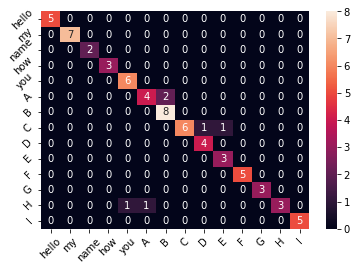

In [98]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,ax=ax)
ax.xaxis.set_ticklabels(actions,rotation=45);
ax.yaxis.set_ticklabels(actions,rotation=45);

# Real Time Prediction

In [111]:
sequence = [] #collect 30 frames
sentence = [] #concatentae history of predictions
predictions = []
threshold = 0.5


cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Reading the frame
        ret, frame = cap.read()

        # Making the  detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # #Drawing landmarks
        draw_styled_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            #             since our model expects input as (1,30,1662) but we get (30,1662) so using expand_dims
#             (no. of sequence , 30 , 1662)
#                 this allows to pass 1 sequence instaed odf 30 
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 29ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 34ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 31ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 30ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
G
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
A
<class 'mediapipe.python.solution_base.SolutionO

1/1 [==============================] - 0s 32ms/step
name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutput

1/1 [==============================] - 0s 30ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
H
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
you
<class 'mediapipe.python.solution_base.SolutionOutputs

In [ ]:
cap.release()
cv2.destroyAllWindows()